In [108]:
'''
HW2 problem
'''

import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.special as sp
import time
from scipy.optimize import minimize

import data_generator as dg

In [109]:

# you can define/use whatever functions to implememt

# Softmax가 적용된 matrix 구하기
def getSoftmax(s):
    return np.exp(s) / np.sum(np.exp(s), axis=0)

# Loss를 계산하기 위해서 one-hot-encoded된 벡터 구하기
def getOneHotVector(correct_class, num_class):
    # class의 수 만큼 0을 넣어놓은 ndarray 생성
    enc = np.zeros(num_class)
    
    # 그리고 정답 클래스에만 1을 넣기
    enc[correct_class] = 1
    return enc

########################################
# cross entropy loss
########################################

# Wb = np.random.normal(0, 1, (2*num_class + num_class))의 결과
# 처음 2*num_class (8개) 요소들은 (num_class X feat_dim) 사이즈 W의 parameter들이고,
# 마지막 num_class (4개) 요소들은 bias 벡터의 parameter들이다.
# 나중에 reshape이랑 slicing을 통해 W와 b로 나눠진다.
# x = x_train (shape: (400, 2))
# y = y_train (shape: (400, 1))
# num_class = 4
# n = 400
# feat_dim = 2
def cross_entropy_softmax_loss(Wb, x, y, num_class, n, feat_dim):
    # implement your function here
    
    # This will give you a score matrix 's' of size (num_class)x(n)
    # the i-th column vector of 's' will be the score vector of size (num_class)x(1) for the i-th input data point
    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:]
    W = np.reshape(Wb[range(num_class * feat_dim)], (num_class, feat_dim))
    x = np.reshape(x.T, (-1, n))
    
    # performing s=Wx+b (s는 4 * 400 사이즈의 score 매트릭스)
    s = W@x + b

    # score matrix 's'를 softmax에 통과시킨다
    softmax_score = getSoftmax(s)
    
    # loss들을 담을 리스트 (n만큼 담는다)
    loss_list = np.zeros(n)
    
    # softmax_score를 column별로 돌면서 정답벡터와 내적한 결과를 loss 매트릭스에 담는다.
    for i in range(n):
        label_vector = getOneHotVector(y[i], num_class)
        loss = softmax_score.T[i]@label_vector
        loss_list[i] = loss
    
    # return cross entropy loss
    loss_sum = -np.sum(np.log(loss_list))
    return loss_sum / num_class

    pass

In [110]:
# now lets test the model for linear models, that is, SVM and softmax
def linear_classifier_test(Wb, x, y, num_class):
    n_test = x.shape[0]
    feat_dim = x.shape[1]
    
    Wb = np.reshape(Wb, (-1, 1))
    b = Wb[-num_class:].squeeze()
    W = np.reshape(Wb[:-num_class], (num_class, feat_dim))
    accuracy = 0

    # W has shape (num_class, feat_dim), b has shape (num_class,)

    # score
    s = x@W.T + b
    # score has shape (n_test, num_class)
    
    # get argmax over class dim
    res = np.argmax(s, axis = 1)

    # get accuracy
    accuracy = (res == y).astype('uint8').sum()/n_test
    
    return accuracy

number of classes:  4  sigma for data scatter: 1.0
generating training data
400 data points generated. Seed is random.


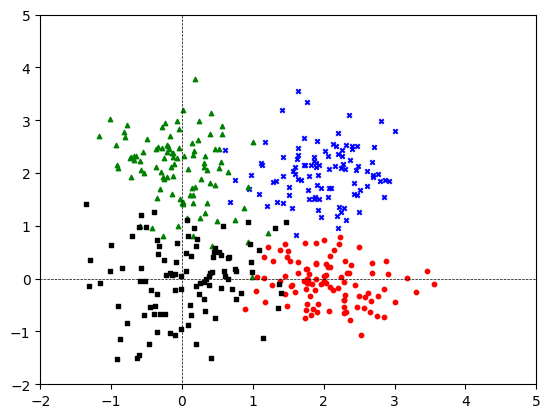

generating test data
100 data points generated. Seed is random.
training softmax classifier...
testing softmax classifier...
accuracy of softmax loss:  91.0 %


In [111]:
# number of classes: this can be either 3 or 4
num_class = 4

# sigma controls the degree of data scattering. Larger sigma gives larger scatter
# default is 1.0. Accuracy becomes lower with larger sigma
sigma = 1.0

print('number of classes: ',num_class,' sigma for data scatter:',sigma)
if num_class == 4:
    n_train = 400
    n_test = 100
    feat_dim = 2
else:  # then 3
    n_train = 300
    n_test = 60
    feat_dim = 2

# generate train dataset
print('generating training data')
x_train, y_train = dg.generate(number=n_train, seed=None, plot=True, num_class=num_class, sigma=sigma)

# generate test dataset
print('generating test data')
x_test, y_test = dg.generate(number=n_test, seed=None, plot=False, num_class=num_class, sigma=sigma)

# start training softmax classifier
print('training softmax classifier...')
w0 = np.random.normal(0, 1, (2 * num_class + num_class))
result = minimize(cross_entropy_softmax_loss, w0, args=(x_train, y_train, num_class, n_train, feat_dim))

print('testing softmax classifier...')

Wb = result.x
print('accuracy of softmax loss: ', linear_classifier_test(Wb, x_test, y_test, num_class)*100,'%')